In [1]:
import numpy as np
import pinocchio as pin
from comparer2 import Comparer
from IPython.display import clear_output

In [2]:
comWeight_list = [0,
	10,
	100,
	250,
	500,
	1000,
	2500,
	5000,
	10000]
default_base = "575"
default_slope = "00"
default_velocity = "40"

comp = Comparer(
    slope_list=[round(float(default_slope)*1e-4, 5)],
    base_list=[round(float(default_base)*1e-3, 5)],
    velocity_list=[round(float(default_velocity)*1e-2, 5)],
    comWeight_list=[0],
)
clear_output(wait=False)

In [3]:
comp.logs = {}
comp.names = []

for w in comWeight_list:
    path = f"../results/finals/varying_com_{default_base}/walk_slope_{default_slope}_comWeight_{w}_vel_{default_velocity}"
    print(path)
    comp.add_log(
        path=f"{path}/closed.npy",
        robot_type="closed",
        name=f"comWeigth_{w}_result",
        s=round(float(default_slope)*1e-4, 5),
        b=round(float(default_base)*1e-3, 5),
        v=round(float(default_velocity)*1e-2, 5),
        w=w,
        )
    comp.add_log(
        path=f"{path}/closed_ws.npy",
        robot_type="closed",
        name=f"comWeight_{w}_ws",
        s=round(float(default_slope)*1e-4, 5),
        b=round(float(default_base)*1e-3, 5),
        v=round(float(default_velocity)*1e-2, 5),
        w=w,
        )
    # comp.add_log(
    #     path=f"{path}/closed_warmstarted.npy",
    #     robot_type="closed",
    #     name=f"comWeight_{w}_warmstarted",
    #     s=round(float(default_slope)*1e-4, 5),
    #     b=round(float(default_base)*1e-3, 5),
    #     v=round(float(default_velocity)*1e-2, 5),
    #     w=w,
    #     )
    # comp.add_log(
    #     path=f"{path}/closed_warmstarted_ws.npy",
    #     robot_type="closed",
    #     name=f"comWeight_{w}_warmstarted_ws",
    #     s=round(float(default_slope)*1e-4, 5),
    #     b=round(float(default_base)*1e-3, 5),
    #     v=round(float(default_velocity)*1e-2, 5),
    #     w=w,
    #     )
    # comp.add_log(
    #     path=f"{path}/closed_warmstarted_warmstarted.npy",
    #     robot_type="closed",
    #     name=f"comWeight_{w}_warmstarted_warmstarted",
    #     s=round(float(default_slope)*1e-4, 5),
    #     b=round(float(default_base)*1e-3, 5),
    #     v=round(float(default_velocity)*1e-2, 5),
    #     w=w,
    #     )

comp.printNames()

../results/finals/varying_com_575/walk_slope_00_comWeight_0_vel_40
Load "../results/finals/varying_com_575/walk_slope_00_comWeight_0_vel_40/closed.npy"!
Load "../results/finals/varying_com_575/walk_slope_00_comWeight_0_vel_40/closed_ws.npy"!
../results/finals/varying_com_575/walk_slope_00_comWeight_10_vel_40
Load "../results/finals/varying_com_575/walk_slope_00_comWeight_10_vel_40/closed.npy"!
Load "../results/finals/varying_com_575/walk_slope_00_comWeight_10_vel_40/closed_ws.npy"!
../results/finals/varying_com_575/walk_slope_00_comWeight_100_vel_40
Load "../results/finals/varying_com_575/walk_slope_00_comWeight_100_vel_40/closed.npy"!
Load "../results/finals/varying_com_575/walk_slope_00_comWeight_100_vel_40/closed_ws.npy"!
../results/finals/varying_com_575/walk_slope_00_comWeight_250_vel_40
Load "../results/finals/varying_com_575/walk_slope_00_comWeight_250_vel_40/closed.npy"!
Load "../results/finals/varying_com_575/walk_slope_00_comWeight_250_vel_40/closed_ws.npy"!
../results/finals

/local/usr/ldematteis/Repositories/Software_LAAS_INRIA/sobec/examples/walk_without_think/trajectory_comparisons/comparer2.py:177: UserWarning: n_iter not found in the log comWeight_0_ws, setting it to -1
  warn(f"n_iter not found in the log {name}, setting it to -1")
/local/usr/ldematteis/Repositories/Software_LAAS_INRIA/sobec/examples/walk_without_think/trajectory_comparisons/comparer2.py:177: UserWarning: n_iter not found in the log comWeight_10_ws, setting it to -1
  warn(f"n_iter not found in the log {name}, setting it to -1")
/local/usr/ldematteis/Repositories/Software_LAAS_INRIA/sobec/examples/walk_without_think/trajectory_comparisons/comparer2.py:177: UserWarning: n_iter not found in the log comWeight_100_ws, setting it to -1
  warn(f"n_iter not found in the log {name}, setting it to -1")
/local/usr/ldematteis/Repositories/Software_LAAS_INRIA/sobec/examples/walk_without_think/trajectory_comparisons/comparer2.py:177: UserWarning: n_iter not found in the log comWeight_250_ws, sett

In [4]:
# ids = (np.array([0, 1])+5*3).tolist()
# name = comp.names[0]
# xs = comp.logs[name]["xs"]
# T = len(xs)
# comp.setFigsize((15, 6))
# comp.setTimeHorizon([0, T])

comp.computeAllCosts()
# comp.compareTotalCosts(ids=ids)

In [5]:
comp.computeAllFootTrajectories()
# comp.plotFootTrajectory(ids=ids)

In [6]:
comp.computeAllCOMTrajectories()
# ids_closed = [0+i*5 for i in range(len(comWeight_list))]
# ids_open = [1+i*5 for i in range(len(comWeight_list))]
# comp.setFigsize((15, 6))
# comp.plotCOMTrajectory(ids=ids_open, title="Open loop", velocity=False)
# comp.plotCOMTrajectory(ids=ids_closed, title="Closed loop", velocity=False)

In [7]:
# comp.setFigsize((15, 6))
# comp.plotFootTrajectory(ids=ids_open, title="Open loop")
# comp.plotFootTrajectory(ids=ids_closed, title="Closed loop")

In [8]:
# n_cases = len(comWeight_list)
# ids = []
# labels = []
# for i in range(n_cases):
#     ids.append(i*5)
#     ids.append(i*5+1)
#     labels.append(f"COM weight {comWeight_list[i]}")
# print(labels)
# comp.plotCOMDiff(ids=ids, title="COM Difference for different bases", labels=labels, velocity=False)
# comp.plotCOMXYDiff(ids=ids)

In [9]:
# print("%%%%%%%% Computing viable trajectories %%%%%%%%")
# ids_failed = []
# names_failed = []
# ids_succeed = []
# names_succeed = []
# for id_o in ids_open:
#     name = comp.names[id_o]
#     if (np.abs(comp.logs[name]["us"][0:T]) < 1e3).all():
#         ids_succeed.append(id_o)
#         names_succeed.append(name)
#     else:
#         ids_failed.append(id_o)
#         names_failed.append(name)
# print("Failed cases")
# print(names_failed)
# print(ids_failed)
# print("Sucessful cases")
# print(names_succeed)
# print(ids_succeed)

In [10]:
# comp.setFigsize((15, 10))
# comp.setTimeHorizon([0, 100])
# comp.plotControls(ids=ids_open[0:], title="Open loop")
# comp.plotControls(ids=ids_closed, title="Closed loop")
# print(comp.names[ids_open[0]])

# import matplotlib.pyplot as plt
# plt.figure()
# us = comp.logs[comp.names[ids_open[0]]]["us"]
# plt.plot(us[:, 0])
# plt.xlim([150, 170])
# plt.yscale("log")

In [11]:
# comp.setFigsize((12, 6))
# comp.compareTotalCosts(ids=ids_closed)

In [12]:
# comp.setFigsize((15, 40))
# comp.compareRunningCosts(ids=ids_open)

## Plotting the graphes with proper legend and design

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

sns.set_palette("colorblind")
matplotlib.rcParams.update({'font.size': 20})
SMALL_SIZE = 10
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('axes', lengendsize=BIGGER_SIZE)    # fontsize of the legend
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [14]:
ids_closed = [0+i*2 for i in range(len(comWeight_list))]
ids_open = [1+i*2 for i in range(len(comWeight_list))]
print(ids_open)
print(ids_closed)

[1, 3, 5, 7, 9, 11, 13, 15, 17]
[0, 2, 4, 6, 8, 10, 12, 14, 16]


0.4830644444799054 0.42721759712084345


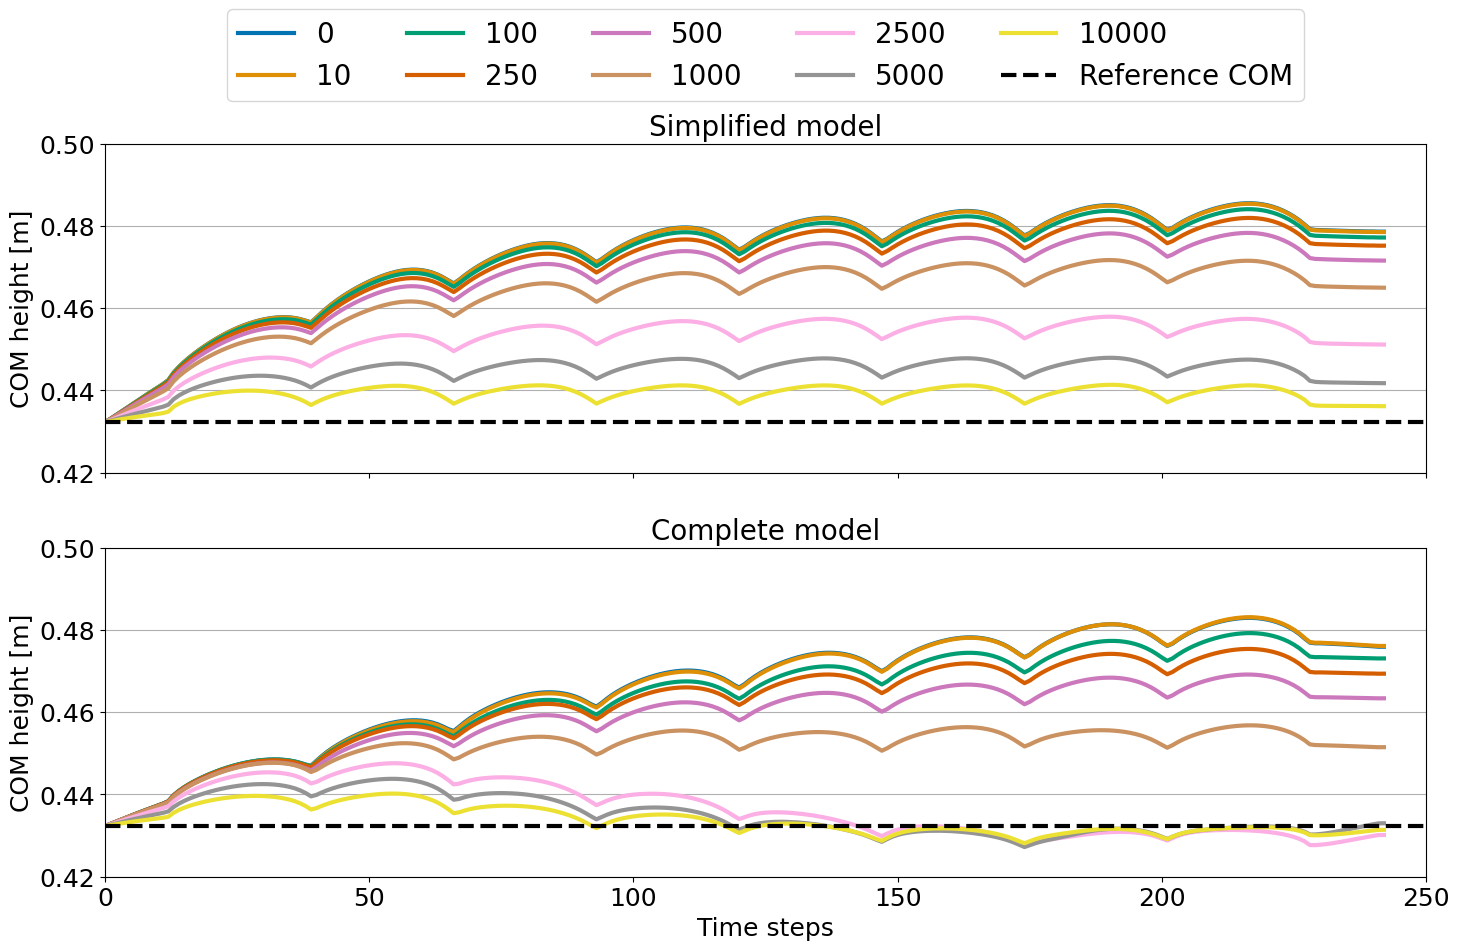

In [19]:
# Plotting the COM height for the different velocities
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
y_axis_limit = [0.42, 0.5]
x_axis_limit = [0, 250]
com0 = comp.logs[comp.names[ids_open[0]]]["com"]["position"][0][2]
com_zmax = np.max([np.max(np.array(comp.logs[comp.names[i]]["com"]["position"])[:, 2]) for i in ids_closed[:-1]])
com_zmin = np.min([np.min(np.array(comp.logs[comp.names[i]]["com"]["position"])[:, 2]) for i in ids_closed[:-1]])
print(com_zmax, com_zmin)
for n, i in enumerate(ids_open[:]):
    name = comp.names[i]
    com_pos = np.array(comp.logs[name]["com"]["position"])
    ax1.plot(com_pos[:, 2], label=f"{comWeight_list[n]}", linewidth=3)
ax1.axhline(com0, xmin=0, xmax=1, color="k", linestyle="--", linewidth=3, label="Reference COM")
# ax1.axhline(com_zmax, xmin=0, xmax=1, color="r", linestyle="--", linewidth=2, label="Complete model extremum")
# ax1.axhline(com_zmin, xmin=0, xmax=1, color="r", linestyle="--", linewidth=2)
ax1.set_ylim(y_axis_limit)
ax1.set_xlim(x_axis_limit)
ax1.set_title("Simplified model")
ax1.grid(axis='y')
ax1.set_ylabel("COM height [m]")
ax1.legend(bbox_to_anchor=(0.5, 1.45), loc='upper center', ncols=5)

for i in ids_closed[:]:
    name = comp.names[i]
    com_pos = np.array(comp.logs[name]["com"]["position"])
    ax2.plot(com_pos[:, 2], linewidth=3)
ax2.axhline(com0, xmin=0, xmax=1, color="k", linestyle="--", linewidth=3)
# ax2.axhline(com_zmax, xmin=0, xmax=1, color="r", linestyle="--", linewidth=2)
# ax2.axhline(com_zmin, xmin=0, xmax=1, color="r", linestyle="--", linewidth=2)
ax2.set_ylim(y_axis_limit)
ax2.set_xlim(x_axis_limit)
ax2.set_title("Complete model")
ax2.grid(axis='y')
ax2.set_xlabel("Time steps")
ax2.set_ylabel("COM height [m]")

plt.tight_layout()
plt.savefig("/home/ldematteis/Images/ICRA_2025/results/finals/varying_com/com_height_comparison.svg", format="svg")
plt.show()
####

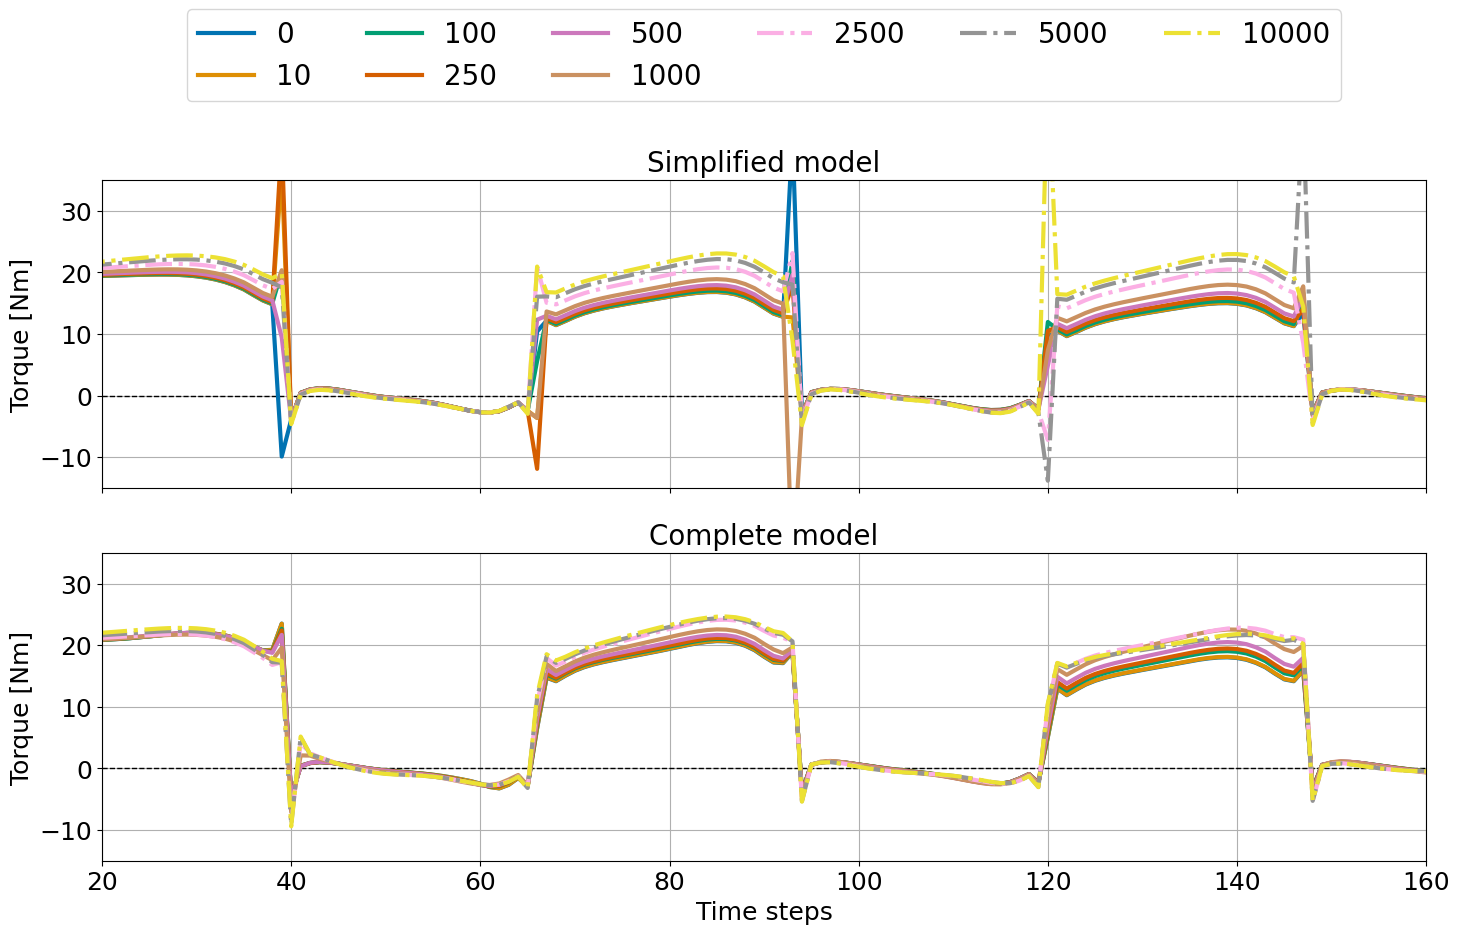

In [20]:
# Comparing controls on the knee for different velocities
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
y_axis_limit = [-15, 35]
# y_axis_limit2 = [-15, 15]
x_axis_limit = [20, 160]

ax1.axhline(0, xmin=0, xmax=1, color="k", linestyle="--", linewidth=1)
selection_open = ids_open[:]
for n, i in enumerate(selection_open):
    name = comp.names[i]
    controls = np.array(comp.logs[name]["us"])
    ax1.plot(controls[:, 5], label=f"{comWeight_list[n]}", linewidth=3, linestyle=["-", "-."][n//6])
    # ax2.plot(controls[:, 2], label=f"{velocity_list[n]} cm/s", linewidth=3)
ax1.set_ylim(y_axis_limit)
ax1.set_xlim(x_axis_limit)
# ax2.set_ylim(y_axis_limit2)
# ax2.set_xlim(x_axis_limit)
ax1.set_title("Simplified model")
# ax2.set_title("Simplified model")
ax1.grid()
# ax2.grid()
ax1.set_ylabel("Torque [Nm]")
ax1.legend(bbox_to_anchor=(0.5, 1.6), loc='upper center', ncols=6)

ax3.axhline(0, xmin=0, xmax=1, color="k", linestyle="--", linewidth=1)
selection_closed = ids_closed[:]
for n, i in enumerate(selection_closed):
    name = comp.names[i]
    controls = np.array(comp.logs[name]["us"])
    ax3.plot(controls[:, 5], linewidth=3, linestyle=["-", "-."][n//6])
    # ax4.plot(controls[:, 2], linewidth=3)
ax3.set_ylim(y_axis_limit)
ax3.set_xlim(x_axis_limit)
# ax4.set_ylim(y_axis_limit2)
# ax4.set_xlim(x_axis_limit)
ax3.set_title("Complete model")
# ax4.set_title("Complete model")
ax3.grid()
# ax4.grid()
ax3.set_xlabel("Time steps")
# ax4.set_xlabel("Time steps")
ax3.set_ylabel("Torque [Nm]")

plt.tight_layout()
plt.savefig("/home/ldematteis/Images/ICRA_2025/results/finals/varying_com/knee_torque_comparison.svg", format="svg")
plt.show()
####